## Loading helper libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

from sklearn.model_selection import train_test_split

from keras.models       import Sequential, Model
from keras.layers       import BatchNormalization, Conv2D, Dense, Dropout, Flatten, GlobalAveragePooling2D, MaxPooling2D, Rescaling
from keras.callbacks    import EarlyStopping
from keras.optimizers   import Adam
from keras.applications import MobileNetV2
from keras.losses       import MeanSquaredError
from keras.utils        import to_categorical,set_random_seed

prng = np.random.RandomState(20240405)
set_random_seed(20240405) 
keras.utils.set_random_seed(20240405)

## Defining helper functions

In [2]:
def plot_model_history(model_histories, labels, main_title):
    plt.figure(figsize=(14, 6))
    
    # Adding main title
    plt.suptitle(main_title, fontsize=14)

    # plotting training & validation accuracy
    plt.subplot(1, 2, 1)
    for model_history, label in zip(model_histories, labels):
        epochs = range(1, len(model_history.history['accuracy']) + 1)
        plt.plot(epochs, model_history.history['accuracy'], label=f'{label} - Training')
        plt.plot(epochs, model_history.history['val_accuracy'], label=f'{label} - Validation', linestyle="--")
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # plotting training & validation loss
    plt.subplot(1, 2, 2)
    for model_history, label in zip(model_histories, labels):
        epochs = range(1, len(model_history.history['loss']) + 1)
        plt.plot(epochs, model_history.history['loss'], label=f'{label} - Training')
        plt.plot(epochs, model_history.history['val_loss'], label=f'{label} - Validation', linestyle="--")
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


## Loading Data

In [84]:
from keras.datasets     import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=prng)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print('__')
print(f"X_val:  {X_val.shape}")
print(f"y_val:  {y_val.shape}")
print('__')
print(f"X_test:  {X_test.shape}")
print(f"y_test:  {y_test.shape}")

X_train: (48000, 28, 28)
y_train: (48000,)
__
X_val:  (12000, 28, 28)
y_val:  (12000,)
__
X_test:  (10000, 28, 28)
y_test:  (10000,)


---
## 1. What would be an appropriate metric to evaluate your models? Why? 


An appropriate metric to evaluate models for the classification task on this dataset would be **Accuracy**. Accuracy measures the proportion of correctly classified instances out of the total instances. Accuracy is also very easy to interpret. It represents the percentage of correct predictions made by the model. Accuracy is also relevant in our case as it directly measures how well the model is performing (the goal is to correctly classify images into one of the ten categories

---
## 2. Get the data and show some example images from the data.

### a) Training Data

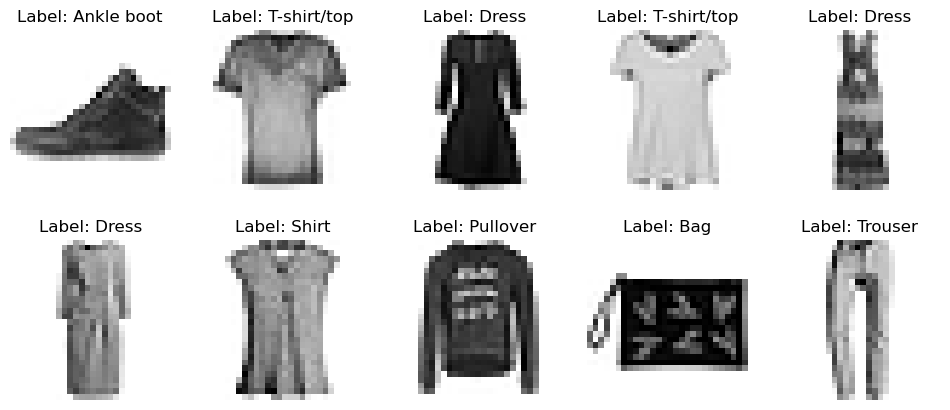

In [4]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

fig, axs = plt.subplots(2, 5, figsize=(12,5))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(X_train[i], cmap="binary")
    ax.axis("off")
    ax.set_title(f"Label: {class_names[y_train[i]]}") 
plt.tight_layout
plt.show()

### b) Validation Data

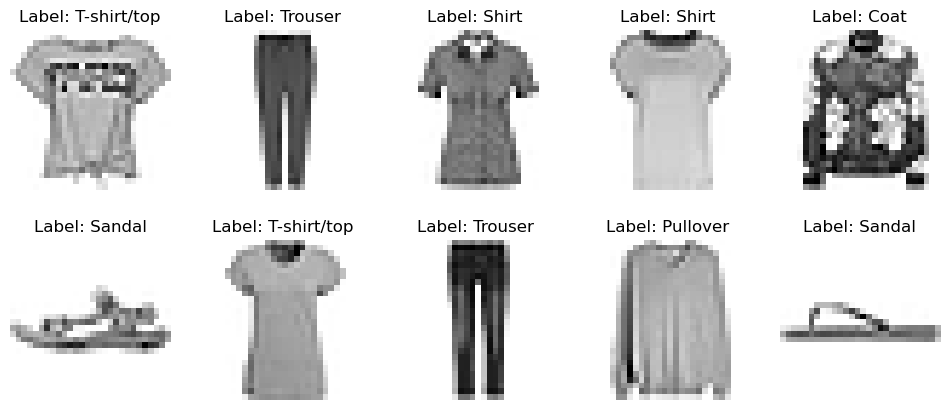

In [5]:

fig, axs = plt.subplots(2, 5, figsize=(12,5))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(X_val[i], cmap="binary")
    ax.axis("off")
    ax.set_title(f"Label: {class_names[y_val[i]]}")
plt.tight_layout
plt.show()

### c) Test Data

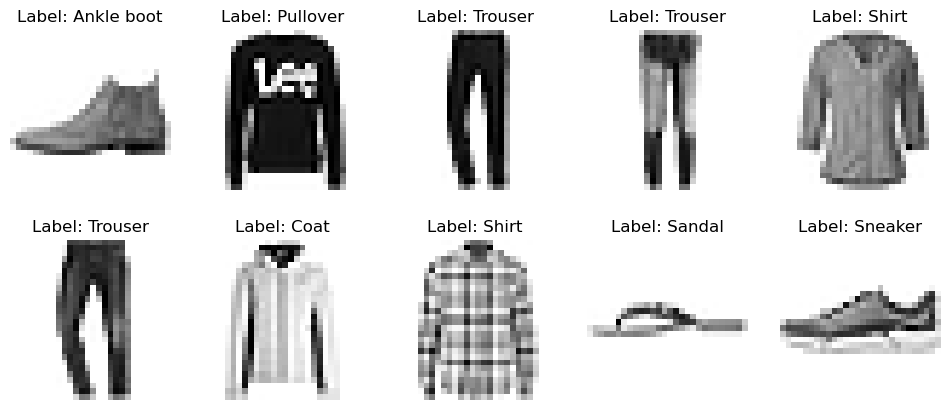

In [6]:
fig, axs = plt.subplots(2, 5, figsize=(12,5))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(X_test[i], cmap="binary")
    ax.axis("off")
    ax.set_title(f"Label: {class_names[y_test[i]]}")
plt.tight_layout
plt.show()

---
## 3.  Train a simple fully connected single hidden layer network to predict the items. 
### Remember to normalize the data similar to what we did in class. Make sure that you use enough epochs so that the validation error begins to level off - provide a plot of the training history.

In [85]:
from keras.utils import to_categorical

class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
num_classes = len(class_names)
print(f"Dimension of y before transformation: {y_train.shape}")

# Convert target variables to categorical
y_sets = [y_train, y_test, y_val]
y_train, y_test, y_val = [to_categorical(y, num_classes=num_classes) for y in y_sets]
print(f"Dimension of y after transformation: {y_train.shape}")

Dimension of y before transformation: (48000,)
Dimension of y after transformation: (48000, 10)


In [86]:
from keras.models import Sequential
from keras.layers import Input, Flatten, Rescaling, Dense

model = Sequential([
    Input(shape=X_train.shape[1:]), 
    Flatten(), 
    Rescaling(1./255), 
    Dense(100, activation='relu'), 
    Dense(num_classes, activation='softmax')
])
print(model.summary())


# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_17 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_18 (Rescaling)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

None


In [87]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20,batch_size = 512)

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6156 - loss: 1.1669 - val_accuracy: 0.8188 - val_loss: 0.5430
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8250 - loss: 0.5251 - val_accuracy: 0.8381 - val_loss: 0.4715
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8425 - loss: 0.4630 - val_accuracy: 0.8463 - val_loss: 0.4396
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8523 - loss: 0.4298 - val_accuracy: 0.8538 - val_loss: 0.4189
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8599 - loss: 0.4066 - val_accuracy: 0.8583 - val_loss: 0.4049
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8655 - loss: 0.3893 - val_accuracy: 0.8613 - val_loss: 0.3934
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8701 - loss: 0.3749 - val_accuracy: 0.8652 - val_loss: 0.3840
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8734 - loss: 0.3631 - val_accuracy: 0.8672 - val_loss:

In [88]:
# Evaluation of the model on the validation set
scores = model.evaluate(X_val, y_val)
print(f"Accuracy for Basic Model: {round(scores[1], 4)},Loss for Basic Model: {round(scores[0], 4)}")

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8842 - loss: 0.3255
Accuracy for Basic Model: 0.8813,Loss for Basic Model: 0.3309


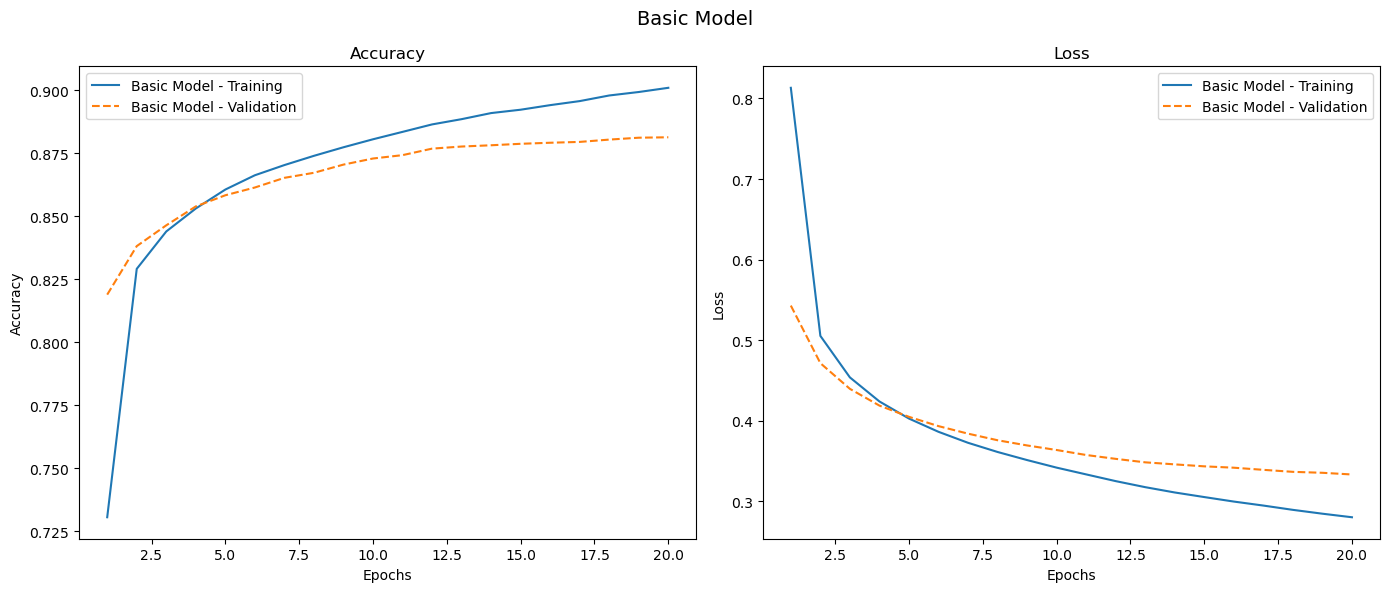

In [89]:
plot_model_history([history], ['Basic Model'],'Basic Model')

---
## 4. Experiment with different network architectures and settings (number of hidden layers, number of nodes, regularization, etc.)
### Train at least 3 models. Explain what you have tried and how it worked.

What I will iterate in my models are node numbers in each layer, adding hidden layers, adding dropout, adding early stopping clause.

Increasing the number of nodes allows for the model to capture the relationship between images and labels more clearly. Adding a hidden layer in a neural network increases the model's capacity to learn complex patterns and representations from the input data.

##### Model 1: Nodes increased to 256 on first layer, added a second hidden layer with 100 nodes.

In [90]:
model1 = Sequential([
    Input(shape=X_train.shape[1:]), 
    Flatten(), 
    Rescaling(1./255), 
    Dense(256, activation='relu'), 
    Dense(100, activation='relu'),    
    Dense(num_classes, activation='softmax')
])
print(model1.summary())


# Compile the model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_18 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_19 (Rescaling)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 100)                 │          25,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 227,670 (889.34 KB)

 Trainable params: 227,670 (889.34 KB)

 Non-trainable params: 0 (0.00 B)

None


In [91]:
history1 = model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20,batch_size = 512)

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6732 - loss: 0.9736 - val_accuracy: 0.8355 - val_loss: 0.4664
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8434 - loss: 0.4493 - val_accuracy: 0.8580 - val_loss: 0.4026
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8604 - loss: 0.3944 - val_accuracy: 0.8702 - val_loss: 0.3727
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8716 - loss: 0.3625 - val_accuracy: 0.8748 - val_loss: 0.3566
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8807 - loss: 0.3392 - val_accuracy: 0.8793 - val_loss: 0.3441
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8875 - loss: 0.3201 - val_accuracy: 0.8825 - val_loss: 0.3352
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8911 - loss: 0.3049 - val_accuracy: 0.8810 - val_loss: 0.3286
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8948 - loss: 0.2929 - val_accuracy: 0.8863 - val_loss:

In [92]:
# Evaluation of the model on the validation set
scores1 = model1.evaluate(X_val, y_val)
print("\n")
print(f"Accuracy for Model 1: {round(scores1[1], 4)},Loss for Model 1: {round(scores1[0], 4)}")

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8960 - loss: 0.3036


Accuracy for Model 1: 0.8917,Loss for Model 1: 0.3103


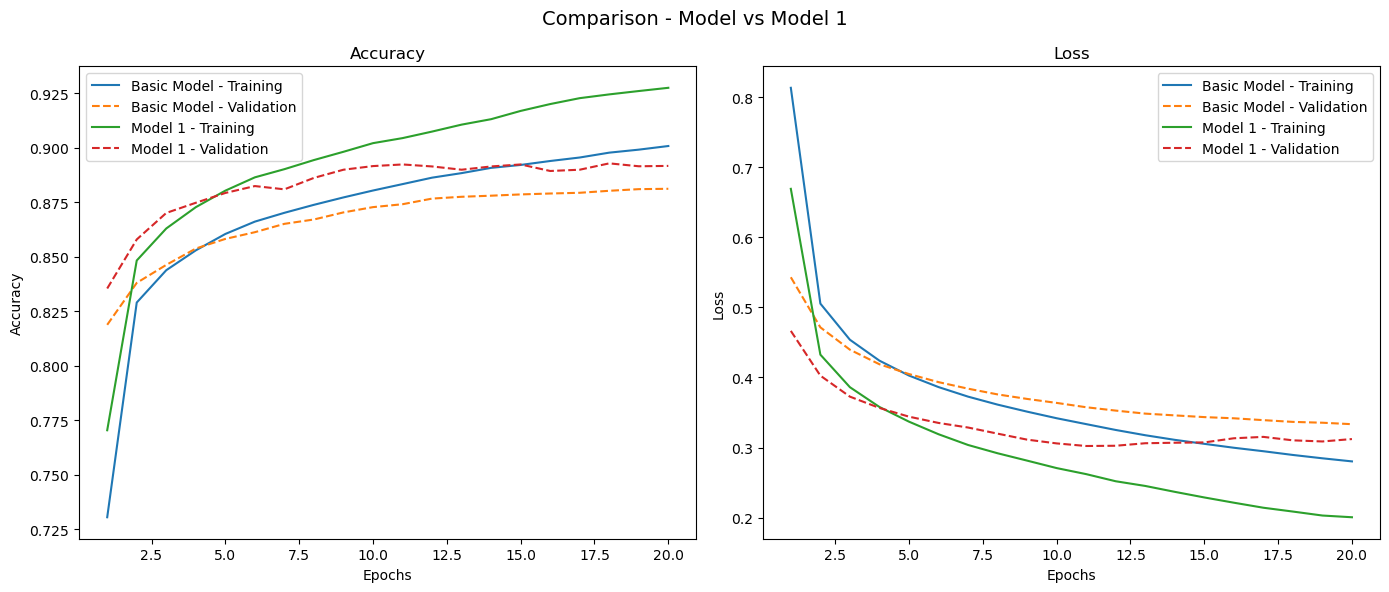

In [93]:
plot_model_history([history,history1], ['Basic Model','Model 1'],'Comparison - Model vs Model 1')

Comparing to our basic model, our first iteration of the model where increased the nodes on the first layer and and added a layer worked pretty well as both accuracy and loss improve<br>

##### Model 2: 256 Nodes on first layer, added a second hidden layer with 100 nodes, added a third hidden layer with 50 nodes

In [16]:
model2 = Sequential([
    Input(shape=X_train.shape[1:]), 
    Flatten(), 
    Rescaling(1./255), 
    Dense(256, activation='relu'),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model2.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          25,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 232,220 (907.11 KB)

 Trainable params: 232,220 (907.11 KB)

 Non-trainable params: 0 (0.00 B)

None


In [17]:
history2 = model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size = 512)

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.6416 - loss: 1.0570 - val_accuracy: 0.8225 - val_loss: 0.5074
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8382 - loss: 0.4625 - val_accuracy: 0.8390 - val_loss: 0.4593
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8543 - loss: 0.4182 - val_accuracy: 0.8641 - val_loss: 0.3879
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8642 - loss: 0.3822 - val_accuracy: 0.8685 - val_loss: 0.3720
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8734 - loss: 0.3568 - val_accuracy: 0.8701 - val_loss: 0.3631
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8792 - loss: 0.3360 - val_accuracy: 0.8734 - val_loss: 0.3522
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8848 - loss: 0.3201 - val_accuracy: 0.8753 - val_loss: 0.3422
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8884 - loss: 0.3074 - val_accuracy: 0.8798 - v

In [18]:
# Evaluation of the model on the validation set
scores2 = model2.evaluate(X_val, y_val)

print(f"Accuracy for Model 2: {round(scores2[1], 4)},Loss for Model 2: {round(scores2[0], 4)}")

print("\n")

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8781 - loss: 0.3501


Accuracy for Model 2: 0.8796,Loss for Model 2: 0.3535


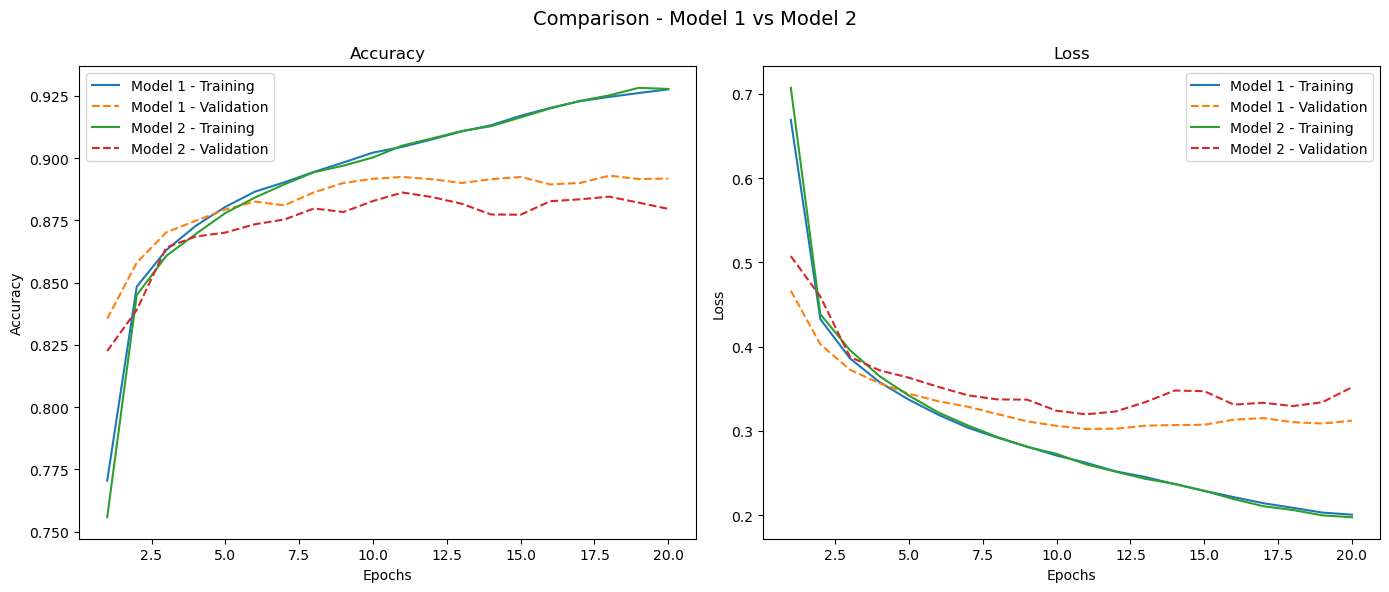

In [94]:
plot_model_history([history1,history2], ['Model 1','Model 2'],'Comparison - Model 1 vs Model 2')

Comparing to our first iteration model, our second iteration of the model where we added a third hidden layer is the worse in accuracy as well as the loss is worse in validation set
<br>

##### Model 3: 100 Nodes on first layer, added a second hidden layer with 25 nodes, added a third hidden layer with 50 nodes

In [19]:
model3 = Sequential([
    Input(shape=X_train.shape[1:]), 
    Flatten(), 
    Rescaling(1./255), 
    Dense(100, activation='relu'),
    Dense(75, activation='relu'),
    Dense(50, activation='relu'),    
    Dense(num_classes, activation='softmax')
])
print(model3.summary())


# Compile the model
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_3 (Rescaling)              │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 75)                  │           7,575 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 50)                  │           3,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 90,385 (353.07 KB)

 Trainable params: 90,385 (353.07 KB)

 Non-trainable params: 0 (0.00 B)

None


In [20]:
history3 = model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size = 512
                      ,callbacks=[EarlyStopping(monitor='val_accuracy', patience=10)])

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.6037 - loss: 1.2183 - val_accuracy: 0.8240 - val_loss: 0.4995
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8270 - loss: 0.4932 - val_accuracy: 0.8407 - val_loss: 0.4456
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8488 - loss: 0.4281 - val_accuracy: 0.8549 - val_loss: 0.4106
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8606 - loss: 0.3963 - val_accuracy: 0.8641 - val_loss: 0.3821
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.8697 - loss: 0.3699 - val_accuracy: 0.8708 - val_loss: 0.3646
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8749 - loss: 0.3511 - val_accuracy: 0.8740 - val_loss: 0.3526
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8803 - loss: 0.3371 - val_accuracy: 0.8783 - val_loss: 0.3428
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8843 - loss: 0.3248 - val_accuracy: 0.8

In [21]:
# Evaluation of the model on the validation set
scores3 = model3.evaluate(X_val, y_val)

print(f"Accuracy for Model 3: {round(scores3[1], 4)},Loss for Model 3: {round(scores3[0], 4)}")

print("\n")

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8874 - loss: 0.3328


Accuracy for Model 3: 0.8867,Loss for Model 3: 0.3393


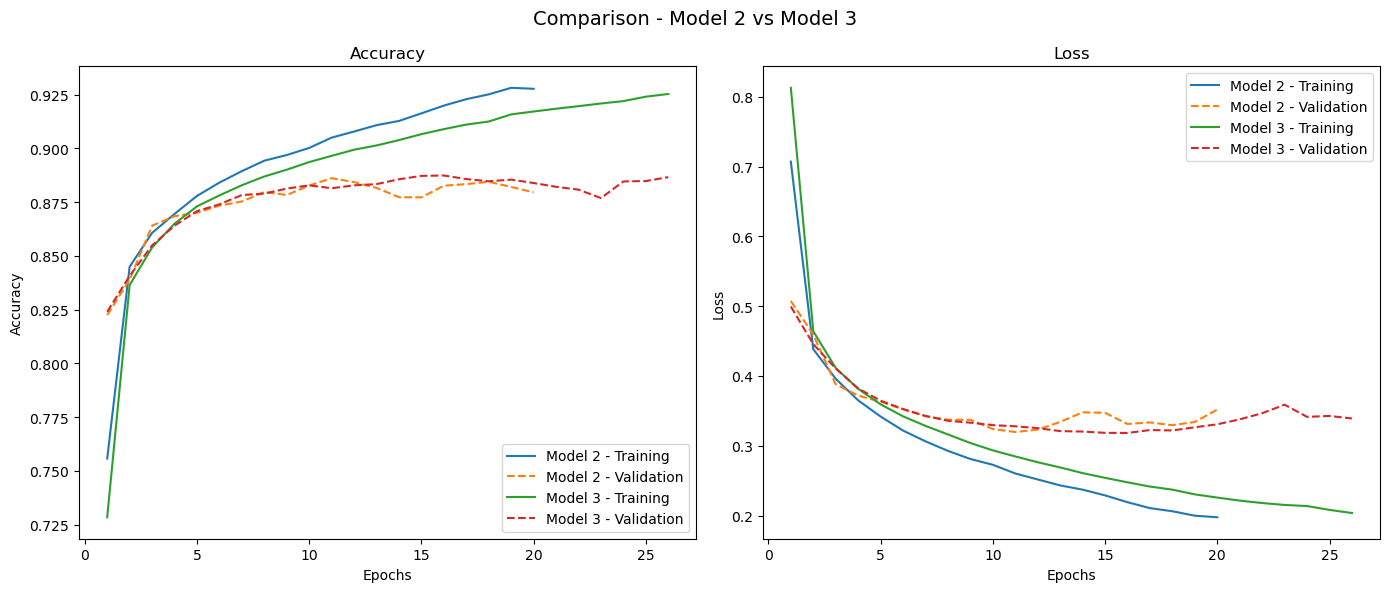

In [95]:
plot_model_history([history2,history3], ['Model 2','Model 3'],'Comparison - Model 2 vs Model 3')

Our third model where we reduced the number of nodes in each layer as well as added an early stopping with a patience level of 5 with 100 epochs does better but it is not comparable as number of epochs are higher
<br>
<br>

##### Model 4: Nodes increased to 512 on first layer, added a Dropout value of 50%, added a second hidden layer with 256 nodes, added a Dropout value of 50%, added a third hidden layer with 100 nodes.

In [22]:
model4 = Sequential([
    Input(shape=X_train.shape[1:]), 
    Flatten(), 
    Rescaling(1./255), 
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='relu'),    
    Dense(num_classes, activation='softmax')
])
print(model4.summary())


# Compile the model
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_4 (Rescaling)              │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 100)                 │          25,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 559,958 (2.14 MB)

 Trainable params: 559,958 (2.14 MB)

 Non-trainable params: 0 (0.00 B)

None


In [23]:
history4 = model4.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size = 512
                      ,callbacks=[EarlyStopping(monitor='val_accuracy', patience=10)])

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.5372 - loss: 1.2692 - val_accuracy: 0.8238 - val_loss: 0.4889
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.8032 - loss: 0.5466 - val_accuracy: 0.8415 - val_loss: 0.4186
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.8294 - loss: 0.4753 - val_accuracy: 0.8597 - val_loss: 0.3760
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.8412 - loss: 0.4398 - val_accuracy: 0.8625 - val_loss: 0.3719
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.8517 - loss: 0.4163 - val_accuracy: 0.8664 - val_loss: 0.3618
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8553 - loss: 0.4015 - val_accuracy: 0.8705 - val_loss: 0.3426
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8553 - loss: 0.3908 - val_accuracy: 0.8726 - val_loss: 0.3408
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.8609 - loss: 0.3747 - val_accuracy: 0.

In [24]:
# Evaluation of the model on the validation set
scores4 = model4.evaluate(X_val, y_val)

print(f"Accuracy for Model 4: {round(scores4[1], 4)},Loss for Model 4: {round(scores4[0], 4)}")

print("\n")

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8915 - loss: 0.2966


Accuracy for Model 4: 0.892,Loss for Model 4: 0.2971


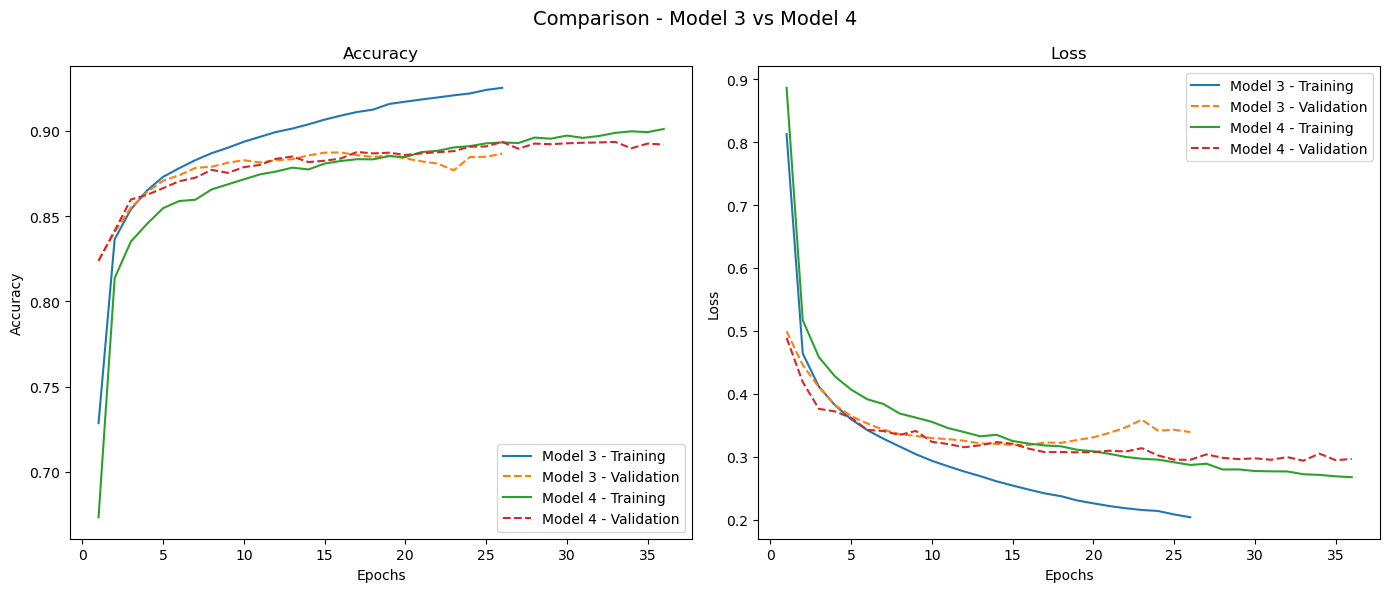

In [96]:
plot_model_history([history3,history4], ['Model 3','Model 4'],'Comparison - Model 3 vs Model 4')

Here the 4th model improves on 3rd model slightly when we add a dropout on the first two layers of 50% <br>
<br>

##### Model 5: Nodes increased to 256 on first layer, added a Dropout value of 50%, added a second hidden layer with 100 nodes, added a Dropout value of 50%, added a third hidden layer with 20 nodes.

In [25]:
model5 = Sequential([
    Input(shape=X_train.shape[1:]), 
    Flatten(), 
    Rescaling(1./255), 
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='relu'),
    Dropout(0.5),
    Dense(20, activation='relu'),    
    Dense(num_classes, activation='softmax')
])
print(model5.summary())


# Compile the model
model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_5 (Rescaling)              │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 100)                 │          25,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 20)                  │           2,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 228,890 (894.10 KB)

 Trainable params: 228,890 (894.10 KB)

 Non-trainable params: 0 (0.00 B)

None


In [26]:
history5 = model5.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size = 512
                      ,callbacks=[EarlyStopping(monitor='val_accuracy', patience=10)])

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.3851 - loss: 1.6822 - val_accuracy: 0.7893 - val_loss: 0.5955
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7534 - loss: 0.7016 - val_accuracy: 0.8225 - val_loss: 0.4785
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7957 - loss: 0.5778 - val_accuracy: 0.8420 - val_loss: 0.4273
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8192 - loss: 0.5173 - val_accuracy: 0.8511 - val_loss: 0.4002
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8298 - loss: 0.4851 - val_accuracy: 0.8553 - val_loss: 0.3911
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8388 - loss: 0.4581 - val_accuracy: 0.8604 - val_loss: 0.3790
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8447 - loss: 0.4409 - val_accuracy: 0.8652 - val_loss: 0.3674
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8496 - loss: 0.4280 - val_accuracy: 0.

In [27]:
# Evaluation of the model on the validation set
scores5 = model5.evaluate(X_val, y_val)

print("\n")
print(f"Accuracy for Model 5: {round(scores5[1], 4)},Loss for Model 5: {round(scores5[0], 4)}")

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8881 - loss: 0.3049


Accuracy for Model 5: 0.8916,Loss for Model 5: 0.3041


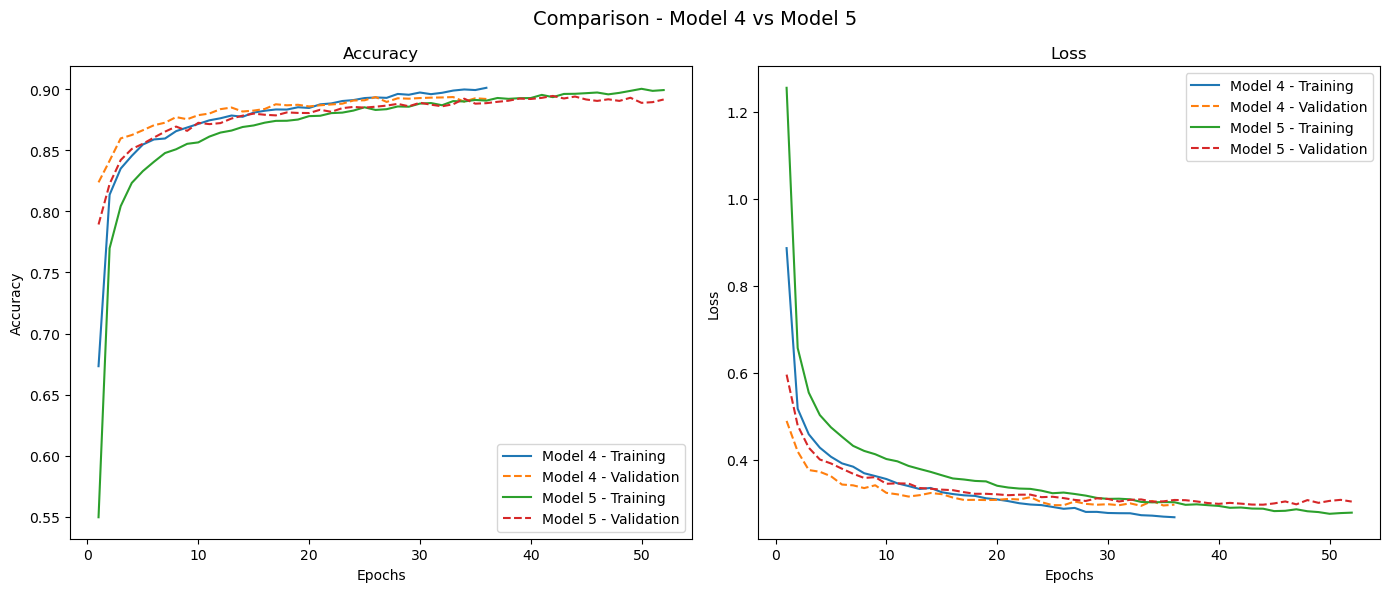

In [98]:
plot_model_history([history4,history5], ['Model 4','Model 5'],'Comparison - Model 4 vs Model 5')

The 5th model is the same as 4th, it only differs in the number of nodes, where we reduce them. As you can see it does not improve the accuracy or the loss

---
## 5. Try to improve the accuracy of your model by using convolution. 
### Train at least two different models (you can vary the number of convolutional and pooling layers or whether you include a fully connected layer before the output, etc.)


In [28]:
from keras.layers import Reshape

preprocess = Sequential([
    Reshape(target_shape=(X_train.shape[1], X_train.shape[2], 1)),  # explicitly state the 4th (channel) dimension
    Rescaling(1./255)
])

X_sets = [X_train, X_test, X_val]
X_train_4D, X_test_4D, X_val_4D = [preprocess(X) for X in X_sets]

##### Model 6: Adding Convolution, Pooling, and Fully Connected Layer with No Hidden Layer

In [29]:
from keras.layers import Conv2D, MaxPooling2D

# Build the model
model6 = Sequential([
    Input(shape=X_train_4D.shape[1:]),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model6.summary())

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │          54,090 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,410 (212.54 KB)

 Trainable params: 54,410 (212.54 KB)

 Non-trainable params: 0 (0.00 B)

None


In [30]:
# Fit the model
history6 = model6.fit(
    X_train_4D, y_train, validation_data=(X_val_4D, y_val), epochs=100, batch_size=2048,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=10)]
)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 160ms/step - accuracy: 0.4792 - loss: 1.7679 - val_accuracy: 0.7388 - val_loss: 0.8033
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - accuracy: 0.7583 - loss: 0.7315 - val_accuracy: 0.7792 - val_loss: 0.6113
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 157ms/step - accuracy: 0.7979 - loss: 0.5844 - val_accuracy: 0.8102 - val_loss: 0.5344
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 150ms/step - accuracy: 0.8251 - loss: 0.5165 - val_accuracy: 0.8267 - val_loss: 0.4903
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 156ms/step - accuracy: 0.8380 - loss: 0.4740 - val_accuracy: 0.8378 - val_loss: 0.4633
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 151ms/step - accuracy: 0.8484 - loss: 0.4457 - val_accuracy: 0.8444 - val_loss: 0.4432
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - accuracy: 0.8561 - loss: 0.4250 - val_accuracy: 0.8501 - val_loss: 0.4262
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - accuracy: 0.8620 - loss: 0.4083 - val_accu

In [31]:
# Evaluation of the model on the validation set
scores6 = model6.evaluate(X_val_4D, y_val)

print(f"Accuracy for Model: {round(scores6[1], 4)},Loss for Model: {round(scores6[0], 4)}")

print("\n")

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9027 - loss: 0.2692
Accuracy for Model: 0.9043,Loss for Model: 0.2692




##### Model 7: Adding Convolution, Pooling, and Fully Connected Layer with a hidden layer (100 Nodes)

In [32]:
model7 = Sequential([
    Input(shape=X_train_4D.shape[1:]),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model7.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model7.summary())

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 100)                 │         540,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 542,230 (2.07 MB)

 Trainable params: 542,230 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

None


In [33]:
# Fit the model
history7 = model7.fit(
    X_train_4D, y_train, validation_data=(X_val_4D, y_val), epochs=100, batch_size=2048,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=5)]
)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 202ms/step - accuracy: 0.5619 - loss: 1.4860 - val_accuracy: 0.7822 - val_loss: 0.6049
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 188ms/step - accuracy: 0.7997 - loss: 0.5637 - val_accuracy: 0.8307 - val_loss: 0.4818
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 196ms/step - accuracy: 0.8411 - loss: 0.4618 - val_accuracy: 0.8477 - val_loss: 0.4290
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 200ms/step - accuracy: 0.8554 - loss: 0.4183 - val_accuracy: 0.8562 - val_loss: 0.4070
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 193ms/step - accuracy: 0.8636 - loss: 0.3931 - val_accuracy: 0.8654 - val_loss: 0.3856
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 193ms/step - accuracy: 0.8731 - loss: 0.3684 - val_accuracy: 0.8709 - val_loss: 0.3710
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 187ms/step - accuracy: 0.8792 - loss: 0.3495 - val_accuracy: 0.8754 - val_loss: 0.3564
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 187ms/step - accuracy: 0.8840 - loss: 0.3349 - val_accu

In [34]:
# Evaluation of the model on the validation set
scores7 = model7.evaluate(X_val_4D, y_val)
print(f"Accuracy for Model: {round(scores7[1], 4)},Loss for Model: {round(scores7[0], 4)}")
print("\n")

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9120 - loss: 0.2546
Accuracy for Model: 0.9101,Loss for Model: 0.2591




##### Model 8: Added 2 Convolution layers, and  2 Pooling layers, and Fully Connected Layer with a hidden layer (256 Nodes)

In [35]:
model8 = Sequential([
    Input(shape=X_train_4D.shape[1:]),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model8.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model8.summary())

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 100)                 │          80,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 90,678 (354.21 KB)

 Trainable params: 90,678 (354.21 KB)

 Non-trainable params: 0 (0.00 B)

None


In [36]:
# Fit the model
history8 = model8.fit(
    X_train_4D, y_train, validation_data=(X_val_4D, y_val), epochs=100, batch_size=2048,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=5)]
)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 296ms/step - accuracy: 0.3796 - loss: 2.0139 - val_accuracy: 0.6952 - val_loss: 0.8466
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 274ms/step - accuracy: 0.7109 - loss: 0.7945 - val_accuracy: 0.7453 - val_loss: 0.6768
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 267ms/step - accuracy: 0.7612 - loss: 0.6429 - val_accuracy: 0.7827 - val_loss: 0.5866
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 264ms/step - accuracy: 0.7915 - loss: 0.5646 - val_accuracy: 0.8036 - val_loss: 0.5296
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 264ms/step - accuracy: 0.8122 - loss: 0.5141 - val_accuracy: 0.8172 - val_loss: 0.4984
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 263ms/step - accuracy: 0.8299 - loss: 0.4767 - val_accuracy: 0.8320 - val_loss: 0.4683
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 263ms/step - accuracy: 0.8408 - loss: 0.4517 - val_accuracy: 0.8408 - val_loss: 0.4485
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 266ms/step - accuracy: 0.8470 - loss: 0.4342 - val_accu

In [37]:
# Evaluation of the model on the validation set
scores8 = model8.evaluate(X_val_4D, y_val)

print("\n")
print(f"Accuracy for Model 8: {round(scores8[1], 4)},Loss for Model 8: {round(scores8[0], 4)}")

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9026 - loss: 0.2604


Accuracy for Model 8: 0.902,Loss for Model 8: 0.2657


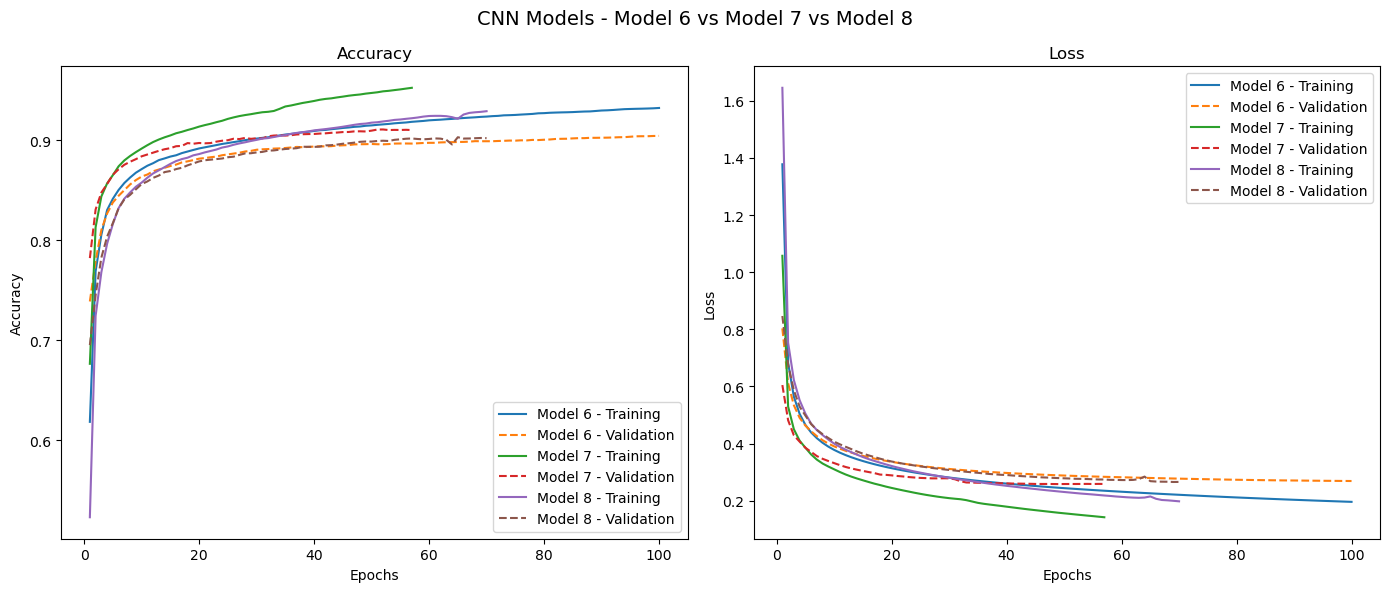

In [99]:
plot_model_history([history6,history7,history8], ['Model 6','Model 7','Model 8'],'CNN Models - Model 6 vs Model 7 vs Model 8')

Model 6 has no middle layer, while model 7 has a middle layer with 100 nodes. Model 8 on the other hand has two convulation layers with a layer of 100 nodes. It is very clear that model 7 is by far the best on validation sets

---
## 6. Try to use a pre-trained network to improve accuracy.

In [38]:
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.utils import load_img, img_to_array
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input
from skimage.color import gray2rgb
from skimage.transform import resize

In [60]:
# Preprocess the data and convert grayscale images to RGB
X_train_resized = np.array([preprocess_input(gray2rgb(img)) for img in X_train])
X_test_resized = np.array([preprocess_input(gray2rgb(img)) for img in X_test])

# Resize the images to match the input shape expected by ResNet50
X_train_resized = np.array([resize(img, (32, 32)) for img in X_train])
X_val_resized = np.array([resize(img, (32, 32)) for img in X_val])

# Load pre-trained ResNet50 model without the top layer (include_top=False)
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the layers in the pre-trained model
for layer in resnet_model.layers:
    layer.trainable = False

# Create a new model and add the pre-trained ResNet50 base
pretrained_model = Sequential()
pretrained_model.add(resnet_model)

# Add additional layers on top of the ResNet50 base
pretrained_model.add(Flatten())
pretrained_model.add(Dense(100, activation='relu'))
pretrained_model.add(Dense(10, activation='softmax'))  # FashionMNIST has 10 classes

# Compile the model
pretrained_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(pretrained_model.summary())


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ ?                           │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

None


In [44]:
# Train the model
history_pre = pretrained_model.fit(X_train_resized, y_train, validation_data=(X_val_resized, y_val), epochs=20, batch_size=4096, callbacks=[EarlyStopping(monitor='val_accuracy', patience=5)])


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 107s 8s/step - accuracy: 0.4011 - loss: 2.8412 - val_accuracy: 0.7360 - val_loss: 0.8053
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 79s 7s/step - accuracy: 0.7564 - loss: 0.7320 - val_accuracy: 0.7747 - val_loss: 0.6158
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 80s 7s/step - accuracy: 0.7915 - loss: 0.5784 - val_accuracy: 0.8033 - val_loss: 0.5363
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 80s 7s/step - accuracy: 0.8137 - loss: 0.5093 - val_accuracy: 0.8183 - val_loss: 0.4959
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 81s 7s/step - accuracy: 0.8319 - loss: 0.4660 - val_accuracy: 0.8270 - val_loss: 0.4682
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 81s 7s/step - accuracy: 0.8424 - loss: 0.4333 - val_accuracy: 0.8375 - val_loss: 0.4480
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 82s 7s/step - accuracy: 0.8525 - loss: 0.4067 - val_accuracy: 0.8421 - val_loss: 0.4336
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 89s 7s/step - accuracy: 0.8605 - loss: 0.3853 - val_accuracy: 0.8451 - val_loss

In [46]:
# Evaluation of the model on the validation set
scores_pre = pretrained_model.evaluate(X_val_resized, y_val)
print(f"Accuracy for ResNet50 : {round(scores_pre[1], 4)}")

375/375 ━━━━━━━━━━━━━━━━━━━━ 31s 84ms/step - accuracy: 0.8643 - loss: 0.3717
Accuracy for ResNet50 : 0.8617


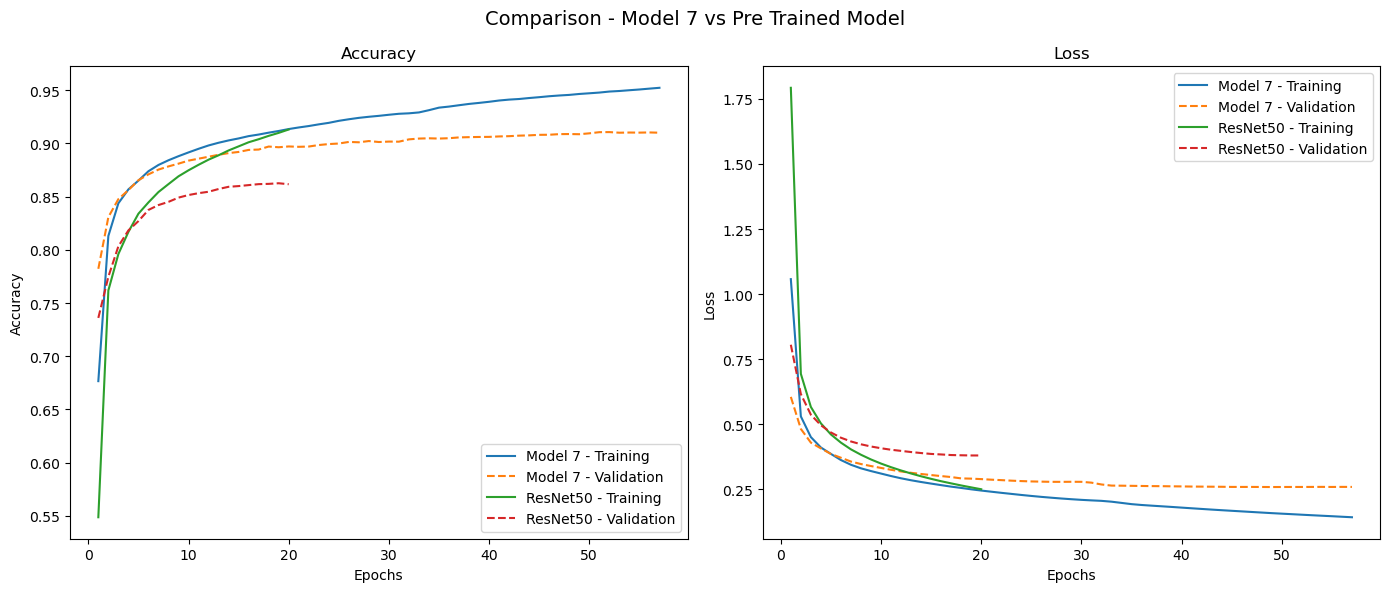

In [100]:
plot_model_history([history7,history_pre], ['Model 7','ResNet50'],'Comparison - Model 7 vs Pre Trained Model')

Using ResNet50 as a pretrained model did not improve accuracy. One reason could be as we tried changin greyscale images to rgb which ResNet50 requires. 

---
## 7. Select a final model and evaluate it on the test set. How does the test error compare to the validation error?

My best model was **Model 7: Adding Convolution, Pooling, and Fully Connected Layer with a hidden layer (100 Nodes)**

In [70]:
print(f"Validation Accuracy: {round(scores7[1], 4)}, Validation Loss: {round(scores7[0], 4)}")
print("\n")

Accuracy for Model: 0.9101,Loss for Model: 0.2591




In [71]:
scores7_test = model7.evaluate(X_test_4D, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9104 - loss: 0.2754


In [73]:
print(f"Test Accuracy: {round(scores7_test[1], 4)},Test Loss: {round(scores7_test[0], 4)}")
print("\n")

Test Accuracy: 0.9084,Test Loss: 0.2681




In [106]:
data = {
    "Model 7": ["Validation", "Test"],
    "Accuracy": [round(scores7[1], 4), round(scores7_test[1], 4)],
    "Loss": [round(scores7[0], 4), round(scores7_test[0], 4)]
}

# Create a dataframe from the dictionary
df = pd.DataFrame(data)

df

,Model 7,Accuracy,Loss
0,Validation,0.9101,0.2591
1,Test,0.9084,0.2681


As you can see the accuracy for test dataset for our best model is pretty close to the validation set as well as the loss score. For reminder, find the details of the model below

In [108]:
print(model7.summary())

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 100)                 │         540,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,626,692 (6.21 MB)

 Trainable params: 542,230 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,084,462 (4.14 MB)

None
